Initializes components for an image captioning model using the Hugging Face Transformers library.

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import matplotlib.pyplot as plt

 Initializes the necessary components for an image captioning system by loading a pre-trained model, an image processor, and a tokenizer from the specified Hugging Face repository, setting up the environment for generating captions from images.

In [ ]:
# Load the pre-trained models and processor
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")  #Model Initialization -specifically designed for image captioning, combining a Vision Transformer (ViT) for image analysis with a GPT-2 model for text generation.
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning") #Feature Extractor -Loads the corresponding image processor that preprocesses images (e.g., resizing, normalization) to ensure they are ready for input into the Vision Transformer.
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning") #Tokenizer -Loads the tokenizer used to convert text into tokens for model input and to decode the model’s output into human-readable captions

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


This code sets up the computing device (GPU or CPU) and moves the model to that device, ensuring optimal performance based on the available hardware.

In [ ]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Device Selection
model.to(device) #Model Transfer

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

Sets parameters for generating captions, including the maximum length of the output and the number of beams for beam search, which together influence the quality and structure of the generated captions.

In [ ]:
# Parameters for generation
max_length = 16 #This parameter specifies the maximum number of tokens (words or subwords) in the generated caption.
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

The predict_step function processes images from given paths, generates captions using a pre-trained model, decodes those captions into text, and returns both the captions and the images for further use or display.

In [ ]:
# Function to generate captions for given image paths
def predict_step(image_paths):
    images = []
    # Load and process images
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")
        images.append(i_image)
           # Extract pixel values
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    # Generate caption ids
    output_ids = model.generate(pixel_values, **gen_kwargs)
     # Decode the generated captions
    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]

    return preds, images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define the dataset directory
dataset_dir = '/content/drive/MyDrive/Flickr8k_Dataset/'


Mounted at /content/drive


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


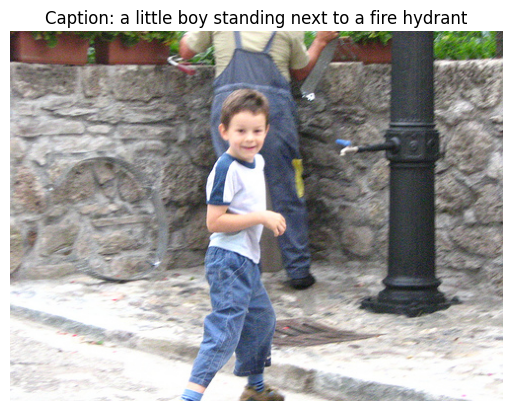

In [ ]:
# Test the function with an image path and display it with its caption
image_path = '/content/drive/MyDrive/Flickr8k_Dataset/Flicker8k_Dataset/1015118661_980735411b.jpg'
captions, images = predict_step([image_path])

# Display the image with the caption
plt.imshow(images[0])
plt.title(f"Caption: {captions[0]}")
plt.axis('off')  # Hide the axes
plt.show()

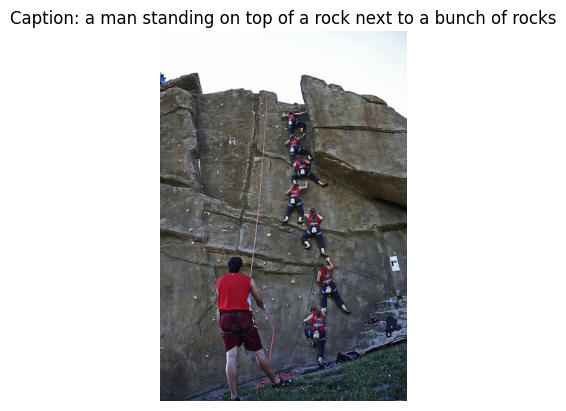

In [ ]:
# Test the function with an image path and display it with its caption
image_path = '/content/drive/MyDrive/Flickr8k_Dataset/Flicker8k_Dataset/1016887272_03199f49c4.jpg'
captions, images = predict_step([image_path])

# Display the image with the caption
plt.imshow(images[0])
plt.title(f"Caption: {captions[0]}")
plt.axis('off')  # Hide the axes
plt.show()

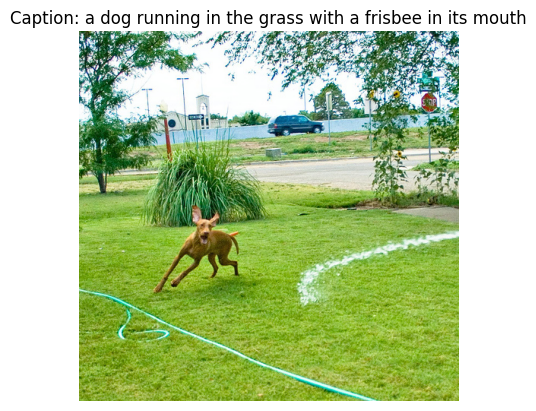

In [ ]:
# Test the function with an image path and display it with its caption
image_path = '/content/drive/MyDrive/Flickr8k_Dataset/Flicker8k_Dataset/1019077836_6fc9b15408.jpg'
captions, images = predict_step([image_path])

# Display the image with the caption
plt.imshow(images[0])
plt.title(f"Caption: {captions[0]}")
plt.axis('off')  # Hide the axes
plt.show()


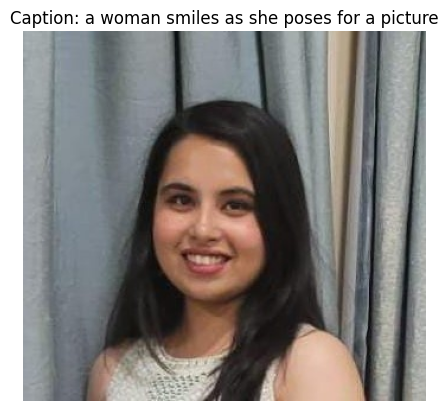

In [ ]:
# Test the function with an image path and display it with its caption
image_path = '/content/drive/MyDrive/madhu-photo.jpeg'
captions, images = predict_step([image_path])

# Display the image with the caption
plt.imshow(images[0])
plt.title(f"Caption: {captions[0]}")
plt.axis('off')  # Hide the axes
plt.show()

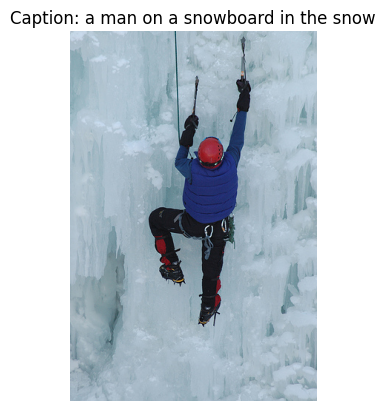

In [ ]:
# Test the function with an image path and display it with its caption
image_path = '/content/drive/MyDrive/Flickr8k_Dataset/Flicker8k_Dataset/102455176_5f8ead62d5.jpg'
captions, images = predict_step([image_path])

# Display the image with the caption
plt.imshow(images[0])
plt.title(f"Caption: {captions[0]}")
plt.axis('off')  # Hide the axes
plt.show()